# Women in Data  

How do women fare in the heavily male-dominated data fields? Are these fields even, in fact, male-dominated? This analysis aims uses a Kaggle dataset of over 20,000 responses from October 2020 of participants working in positions ranging from  data analyst to machine learning engineer. It aims to answer the following questions:


What is the ratio of male to female employees and students in the data-related fields?
Is there a discrepency in type of experience needed depending on the gender of the employee?
Are there any sub-sectors that feature more than one gender or another? 
What are some descriptive statistics of women working in data in the US?


First we begin by importing the dataset and checking out some of the features that are present. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

data.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,401,30-34,Man,India,Bachelor’s degree,Data Analyst,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,748,22-24,Man,Brazil,Bachelor’s degree,Student,3-5 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,171196,25-29,Woman,China,Master’s degree,Student,< 1 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploration

In [5]:
data["Q8"].value_counts()

Python                                                                                                        14241
R                                                                                                              1259
SQL                                                                                                             849
C++                                                                                                             325
C                                                                                                               301
MATLAB                                                                                                          195
Java                                                                                                            167
Other                                                                                                           151
Julia                                                                   

We can see here that most who are working in the field of data recommend learning Python as the first language for aspiring data scientists. Hooray! 

In [6]:
data["Q2"].value_counts()

Man                                       15789
Woman                                      3878
Prefer not to say                           263
Prefer to self-describe                      54
Nonbinary                                    52
What is your gender? - Selected Choice        1
Name: Q2, dtype: int64

Here, we can already see that there are 3,878 women and 15,789 men who completed the survey. That means that for every women, there are 4 men.

But, how does this fare depending on the country? 
Let's take a look at the US. 

In [7]:
data[data["Q3"] == "United States of America"]["Q2"].value_counts()

Man                        1680
Woman                       483
Prefer not to say            50
Nonbinary                    18
Prefer to self-describe       6
Name: Q2, dtype: int64

Here we can see that in the US,  the discrepency is not as intense since for every women in the field there are 3.5 men. What if we are curious to see how this ratio fares throughout all of the countries listed on our survey? We will visualize this later, but first let's clean up this column a bit. Since we can see that Nonbinary genders and unknown genders make up only about 2% of all of our observations, we can take them out without severely affecting out analysis. 

In [21]:
## First we start by splitting the datasets into the genders that we want to analyze. Now have these individual datasets that we can use for out analysis later on.
women = data[data["Q2"] == "Woman"]
men = data[data["Q2"] == "Man"]

#Next we will combined the new subdatasets to get a complete data set with both genders that we wish to analyze. 
combined = women.merge(men, how = "outer")


## Differences in Level of Education 

Text(0.5, 1.0, 'Woman in Data Education')

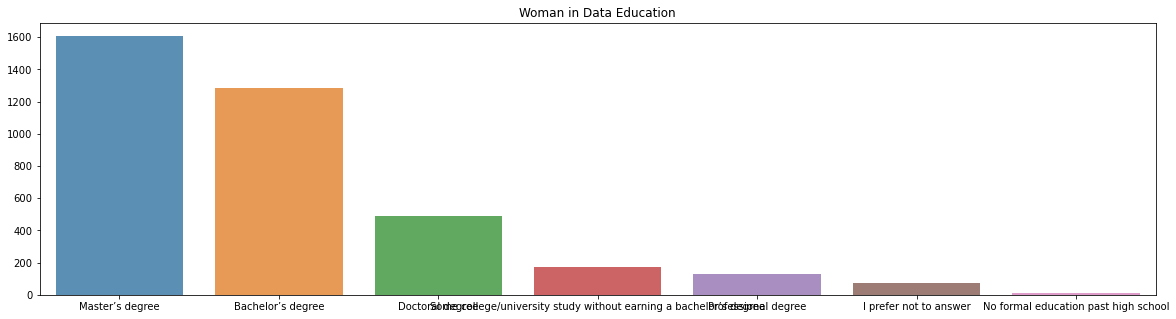

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt 

# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# ax1.women["Q4"].value_counts().plot(kind='barh')
# ax2.men["Q4"].value_counts().plot(kind='barh')


women_count = women["Q4"].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(women_count.index, women_count.values, alpha=0.8)
plt.title('Woman in Data Education')

Text(0.5, 1.0, 'Men in Data Education')

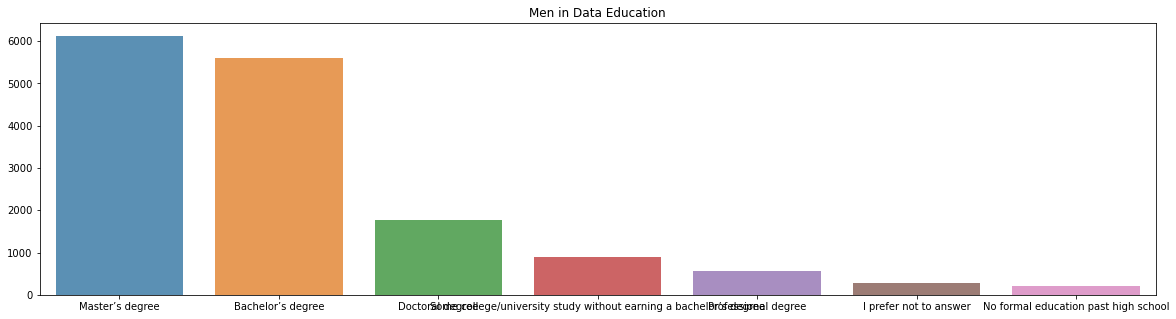

In [10]:
men_count = men["Q4"].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(men_count.index, men_count.values, alpha=0.8)
plt.title('Men in Data Education')


As we can see from the graphs of above, more men hold only a bachelor's degree but there is not major discrepency between the level of education needed by either gender. 

In [23]:
women_titles = women["Q5"].value_counts()[:6]

In [24]:
men_titles = men["Q5"].value_counts()[:6]

Text(0.5, 1.0, 'Men vs Women in Data Positions Internationally')

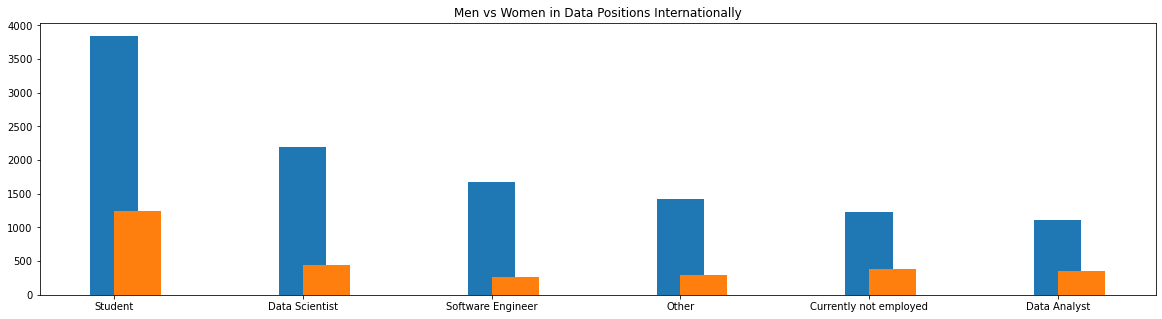

In [27]:
width = 0.25

pos = list(range(len(combined['Q3'])))
fig, axs = plt.subplots(figsize=(20,5))
plt.bar(men_titles.index, men_titles.values, width)
plt.bar(women_titles.index, women_titles.values, width, align = "edge")
plt.title('Men vs Women in Data Positions Internationally')


We can see here that each of the major position in the surveys has severe discrepency with software engineering featuring the greatest discrepency and data analyst featuring the least. 

Text(0.5, 1.0, 'Men vs Women in Data Positions within the US')

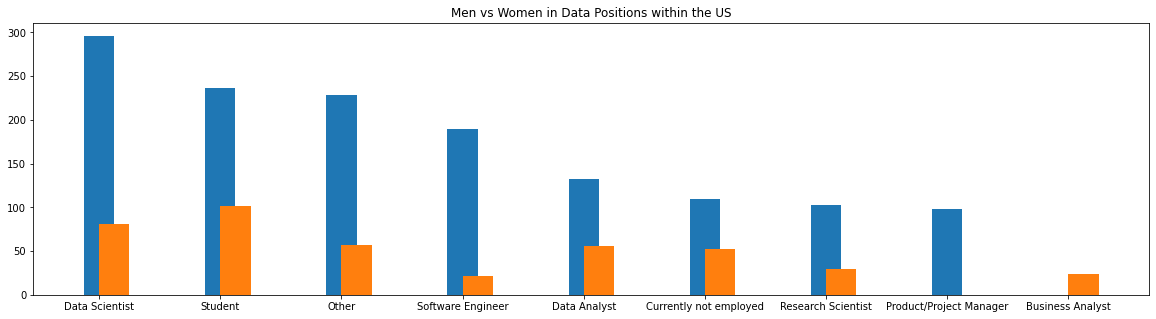

In [26]:
men_titles_usa = men[men["Q3"]=="United States of America"]["Q5"].value_counts()[:8]
women_titles_usa = women[women["Q3"]=="United States of America"]["Q5"].value_counts()[:8]
width = 0.25

pos = list(range(len(combined['Q3'])))
fig, axs = plt.subplots(figsize=(20,5))
plt.bar(men_titles_usa.index, men_titles_usa.values, width)
plt.bar(women_titles_usa.index, women_titles_usa.values, width, align = "edge")
plt.title('Men vs Women in Data Positions within the US')



We can see here that each of the major positions in the surveys has severe discrepency with software engineering featuring the greatest discrepency and data analyst and student positions featuring the least. Compared to the international chart, there are significantly more female students in the US. 

Let's narrow our analysis down by looking at women working in data within the US. 

It would be interesting to look at salary differences but it's difficult to compare these two categories since there are a lot fewer women who took the survey than men. Let's keep these features, but convert some values into percentages to get a clearer picture. 

In [29]:
working_adult_men = men[men["Q5"]!="Student"]
working_adult_men = working_adult_men[working_adult_men["Q5"]!="Currently not employed"]
working_adult_men = working_adult_men[working_adult_men["Q5"]!="Other"]
working_adult_men_USA = working_adult_men[working_adult_men["Q3"]=="United States of America"]

women_salaries = working_adult_men_USA["Q24"].value_counts()

women_percentages = pd.DataFrame(women_salaries.index, women_salaries.values)
women_percentages.reset_index(inplace = True)
women_percentages["percentfromtotal"] = ((women_percentages["index"]/sum(women_percentages["index"])*100))
women_percentages

,index,0,percentfromtotal
0,164,"100,000-124,999",17.118998
1,162,"150,000-199,999",16.910230
2,130,"125,000-149,999",13.569937
3,73,"90,000-99,999",7.620042
4,67,"200,000-249,999",6.993737
5,63,"70,000-79,999",6.576200
6,57,"80,000-89,999",5.949896
7,54,$0-999,5.636743
8,36,"60,000-69,999",3.757829
9,27,"50,000-59,999",2.818372


In [35]:
working_adult_women = women[women["Q5"]!="Student"]
working_adult_women = working_adult_women[working_adult_women["Q5"]!="Currently not employed"]
working_adult_women = working_adult_women[working_adult_women["Q5"]!="Other"]
# working_adult_women = women[women["Q5"]!="Other"]
working_adult_women_USA = working_adult_women[working_adult_women["Q3"]=="United States of America"]


In [36]:
women_salaries = working_adult_women_USA["Q24"].value_counts()
women_percentages = pd.DataFrame(women_salaries.index, women_salaries.values)
women_percentages.reset_index(inplace = True)
women_percentages["percentfromtotal"] = ((women_percentages["index"]/sum(women_percentages["index"])*100))
women_percentages = women_percentages[women_percentages[0] != "$0-999"]
women_percentages = women_percentages[:7]

In [37]:
men_salaries = working_adult_men_USA["Q24"].value_counts()
men_percentages = pd.DataFrame(men_salaries.index, men_salaries.values)
men_percentages.reset_index(inplace = True)
men_percentages["percentfromtotal"] = ((men_percentages["index"]/sum(men_percentages["index"])*100))
men_percentages = men_percentages[:7]

<BarContainer object of 7 artists>

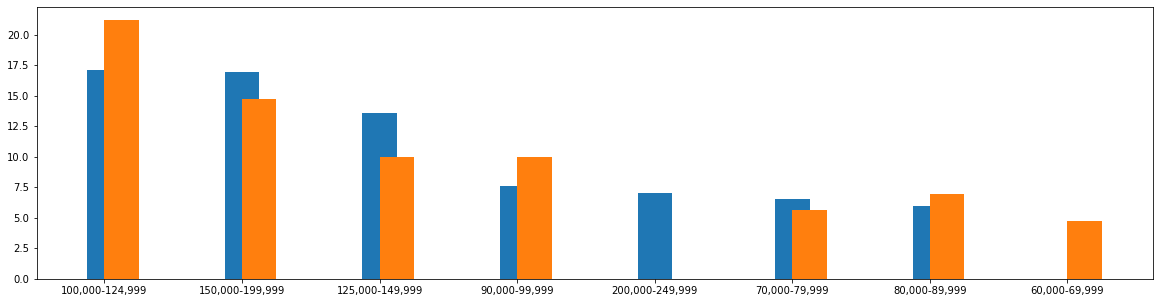

In [32]:
pos = list(range(len(men_percentages)))
fig, axs = plt.subplots(figsize=(20,5))
plt.bar(men_percentages[0], men_percentages["percentfromtotal"], width)
plt.bar(women_percentages[0], women_percentages["percentfromtotal"], width, align = "edge")

As we can see from the graph above, women working in data in the US earn more than their male counterparts in the 100-125 thousand USD range and in the 80-100 thousand USD range. However, they learn less in nearly every other category and no takers of the suvey that were female earned more than 200,000. 